In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
file_path='/kaggle/input/house-price/1553768847-housing.csv'

In [3]:
#data loading
data=pd.read_csv(file_path)

data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# Data Preprocessing

In [6]:
#data preprocessing

missing_values=data.isnull().sum()

missing_percentage=(missing_values/len(data))*100

print(f"Missing values in each column\n ",missing_values)
print(f"Missing percentage in each column\n ",missing_percentage)

Missing values in each column
  longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64
Missing percentage in each column
  longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64


In [7]:
#chosen to drop missing values
data_new=data.dropna()
missing_values=data_new.isnull().sum()
print(f"Missing values now\n",missing_values)

Missing values now
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [8]:
#basics metrics for data using pandas
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# IQR Outliers Removing

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


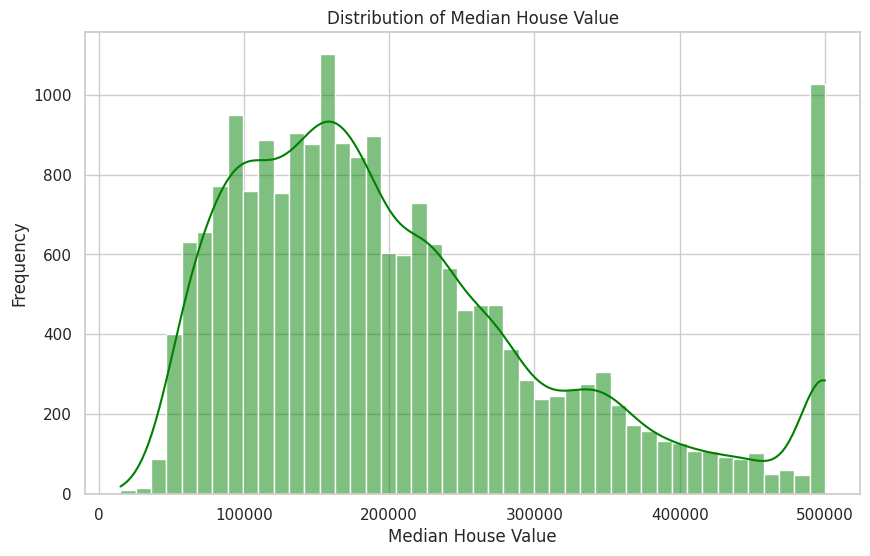

In [9]:
# frequency histogram for dependent variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_new['median_house_value'],color="green",kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [10]:
#removing outliers by IQR

Q1=data_new['median_house_value'].quantile(0.25) # 25th percentile
print(Q1)
Q3=data_new['median_house_value'].quantile(0.75) #75th percentile
print(Q3)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR #lower bound
upper_bound=Q3+1.5*IQR #upper bound

data_no_outliers=data_new[(data_new['median_house_value']>=lower_bound) & (data_new['median_house_value']<=upper_bound)]

print(data_new.shape)
print(data_no_outliers.shape)


119500.0
264700.0
(20433, 10)
(19369, 10)


In [11]:
#removing oultiers for median income
Q1=data_new['median_income'].quantile(0.25) # 25th percentile
print(Q1)
Q3=data_new['median_income'].quantile(0.75) #75th percentile
print(Q3)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR #lower bound
upper_bound=Q3+1.5*IQR #upper bound

data_no_outliers_2=data_no_outliers[(data_no_outliers['median_income']>=lower_bound) & (data_no_outliers['median_income']<=upper_bound)]

print(data_no_outliers.shape)
print(data_no_outliers_2.shape) 


2.5637
4.744
(19369, 10)
(19149, 10)


In [12]:
data=data_no_outliers_2


# Correlation HeatMap

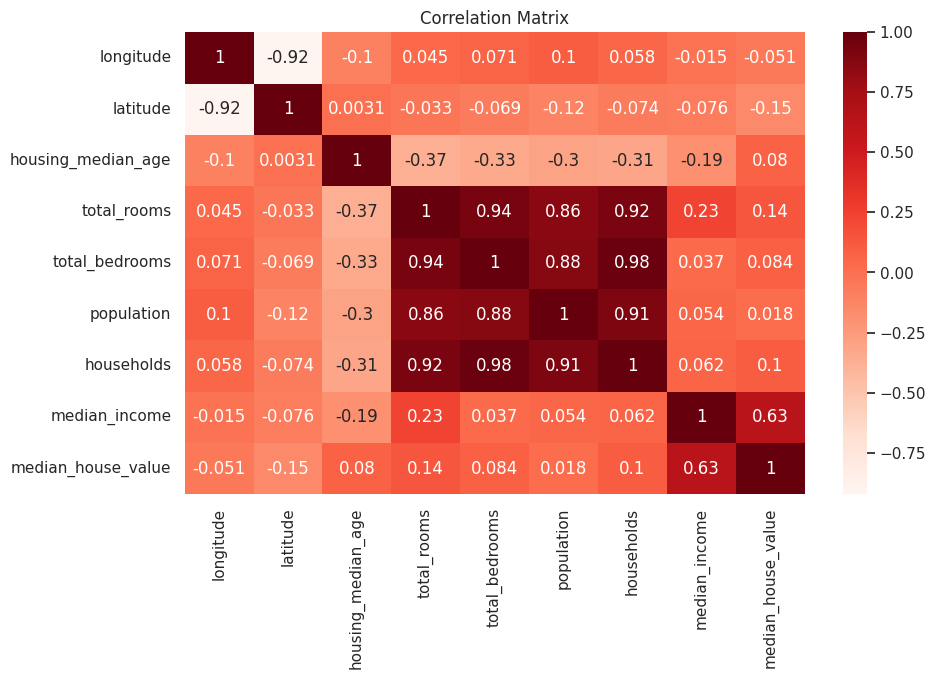

In [13]:
#correlation matrix

data_new2=data.drop(columns='ocean_proximity') #without last categorical column

plt.figure(figsize=(10,6))
sns.heatmap(data_new2.corr(),annot=True,cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [14]:
#after correlation heatmap analysis we drop total_bedrooms column
data=data.drop(columns='total_bedrooms')

In [15]:
data

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,median_house_value
2,-122.24,37.85,52,1467,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,1094,514,3.6591,NEAR BAY,299200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,741,349,1.8672,INLAND,84700


# Dummy for Categorical Variables

In [16]:
#dummy for categorical variables

ocean_proximity_dummies=pd.get_dummies(data['ocean_proximity'],prefix="ocean_proximity")
data=pd.concat([data.drop("ocean_proximity",axis=1),ocean_proximity_dummies],axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [17]:
#droping one column
data=data.drop("ocean_proximity_ISLAND",axis=1)
data

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52,1467,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,565,259,3.8462,342200,False,False,True,False
5,-122.25,37.85,52,919,413,193,4.0368,269700,False,False,True,False
6,-122.25,37.84,52,2535,1094,514,3.6591,299200,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,845,330,1.5603,78100,False,True,False,False
20636,-121.21,39.49,18,697,356,114,2.5568,77100,False,True,False,False
20637,-121.22,39.43,17,2254,1007,433,1.7000,92300,False,True,False,False
20638,-121.32,39.43,18,1860,741,349,1.8672,84700,False,True,False,False


# Train/Test Splitting

In [18]:
#splitting data on train and test
#dependent variable is target,all the rest are independent
target='median_house_value'
X=data.loc[:,data.columns!=target]
y=data.loc[:,data.columns==target]

#split on train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

print(f'Training set size {X_train.shape[0]} samples')
print(f'Test set size {X_test.shape[0]} samples')

Training set size 15319 samples
Test set size 3830 samples


# Training

In [19]:
#training

#adding constant in regression equatation
X_train_const=sm.add_constant(X_train)
X_train_const


,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18996,1.0,-121.92,38.37,26,2056,933,367,2.7051,False,True,False,False
16847,1.0,-122.41,37.61,46,2975,1479,577,3.8214,False,False,False,True
9193,1.0,-119.53,37.34,26,4047,571,199,2.3482,False,True,False,False
10998,1.0,-117.80,33.76,27,2655,1017,335,6.9014,True,False,False,False
2998,1.0,-119.02,35.32,14,2927,1821,561,3.3529,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15264,1.0,-117.29,33.05,28,1146,672,292,3.1667,False,False,False,True
9566,1.0,-120.60,37.35,34,1722,904,315,2.4653,False,True,False,False
12532,1.0,-121.51,38.57,36,613,425,147,2.2031,False,True,False,False
2889,1.0,-118.99,35.39,52,2805,1325,522,2.5083,False,True,False,False


In [20]:
#Fit model
model_fitted=sm.OLS(y_train,X_train_const.astype(float)).fit()

#summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     2071.
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:27:27   Log-Likelihood:            -1.9008e+05
No. Observations:               15319   AIC:                         3.802e+05
Df Residuals:                   15307   BIC:                         3.803e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Test preditiction

In [23]:
#testing predictions

X_test_const=sm.add_constant(X_test)

X_test_const

test_predictions=model_fitted.predict(X_test_const)

test_predictions

12668     99422.758763
4912     133869.370253
7994     233655.940431
3072      71256.009914
942      185337.042986
             ...      
13645     68791.193225
14122    163384.004208
3581     300307.982836
12890    139562.709753
1149      46312.373779
Length: 3830, dtype: object

# Checking OLS Assumtions

## Assumtion 1 Linearity

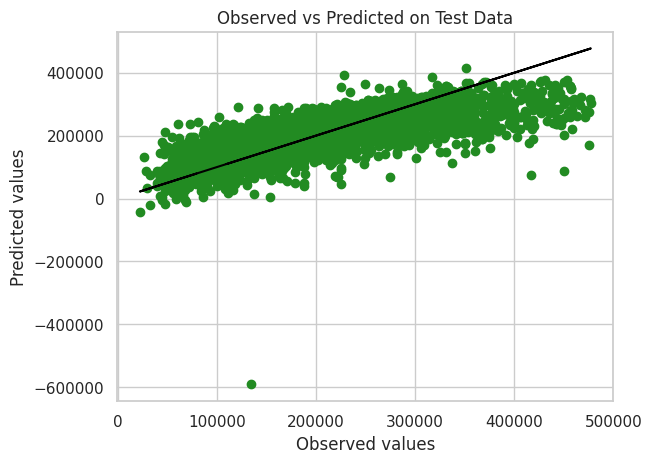

In [25]:
#scatter plot to observed vs predicted test data
plt.scatter(y_test,test_predictions,color="forestgreen")
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.title("Observed vs Predicted on Test Data")
plt.plot(y_test,y_test,color="black") #line for perfect plot
plt.show()

## Assumtion 2 Random Sample

In [27]:
mean_residuals=np.mean(model_fitted.resid)
print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is 0.0


**We see that the mean of residuals is 0.0 round by 2 decimals which means that differences between observed values and predicted values is moving around zero which can tells us that model is well-fitted.**

## Assumtion 3 Exogeneity

In [28]:
# residuals calculation
residuals = model_fitted.resid

# correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


## Assumtion 4 Homoskedasticty

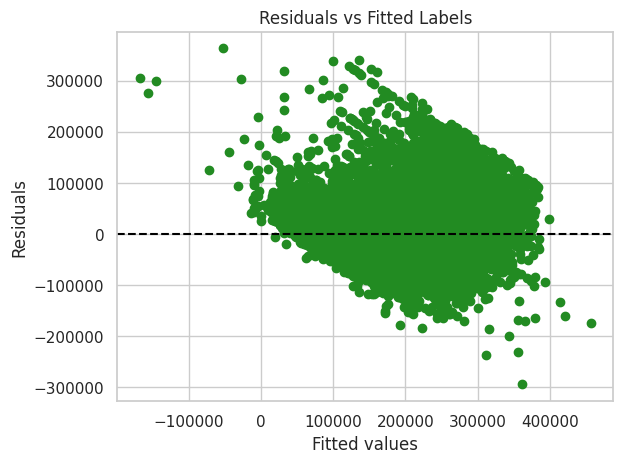

In [33]:
#plotting residuals

plt.scatter(model_fitted.fittedvalues,model_fitted.resid,color="forestgreen")
plt.axhline(y=0,color="black",linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Labels")
plt.show()

**Pattern or Shape: If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.**

# Train/Test Evaluation with Sklearn

In [35]:
from sklearn.preprocessing import StandardScaler

#initialization
scaler=StandardScaler()
#fit and transform the scaler on training data
train_scaler=scaler.fit_transform(X_train)
#fit and transform the scaler on test data
test_scaler=scaler.transform(X_test)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

#Create and fit
lr=LinearRegression()
lr.fit(train_scaler,y_train)

#Predictions
y_pred=lr.predict(test_scaler)

#MSE and RSE
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)

print(f"Root Mean Square Error is {np.round(rmse,2)}")

Root Mean Square Error is 58685.5
